# practice 4. Logistic Regression 

데이터 셋 링크: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv  
참고자료: https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial

이 데이터 집합에는 호주 전역의 여러 위치에서 약 10년간의 일일 기상 관측 데이터가 포함되어 있습니다. 내일 비가 올지 여부를 나타낸 RainTomorrow 여부를 예측하는 logistic regression 모델을 학습시키고, 성능을 측정하고, 결과를 해석해보세요.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

print(mpl.rcParams['font.family'])

['NanumGothic']


In [154]:
import statsmodels.api as sm

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def load_weather_dataset():
    df = pd.read_csv("./data/weather.csv")
    X = df.drop(["RainTomorrow"], axis=1)
    y = df["RainTomorrow"]
    return train_test_split(X, y, train_size=0.8, random_state=1234)

In [5]:
x_train, x_test, y_train, y_test = load_weather_dataset()

In [6]:
x_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
92882,2016-05-24,GoldCoast,17.7,25.3,0.0,NaN,NaN,SSE,43.0,S,...,24.0,41.0,40.0,1017.6,1015.2,NaN,NaN,23.5,23.2,No
98353,2014-04-23,Adelaide,8.1,20.9,0.0,3.6,9.2,WNW,22.0,NaN,...,9.0,63.0,34.0,1018.8,1014.9,NaN,NaN,14.6,20.1,No
49669,2010-09-08,Tuggeranong,-0.7,14.2,0.0,NaN,NaN,N,33.0,NNE,...,11.0,65.0,40.0,1027.4,1022.6,NaN,NaN,7.6,13.5,No
113818,2015-04-16,Witchcliffe,6.4,20.1,0.0,NaN,NaN,SE,28.0,NaN,...,19.0,72.0,52.0,1033.5,1029.5,NaN,NaN,15.0,19.8,No
50325,2012-07-26,Tuggeranong,2.4,11.9,3.0,NaN,NaN,N,22.0,NNW,...,2.0,85.0,79.0,1015.1,1011.3,NaN,NaN,9.2,10.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41239,2013-11-26,Williamtown,13.9,22.8,5.0,5.2,7.9,SSE,48.0,WSW,...,33.0,52.0,45.0,1015.8,1016.0,6.0,2.0,18.9,21.7,Yes
55985,2011-06-02,Ballarat,3.3,14.7,0.0,NaN,NaN,N,46.0,NNE,...,30.0,84.0,70.0,1026.4,1022.0,2.0,NaN,10.1,13.7,No
32399,2014-06-01,Sydney,14.8,20.7,11.2,5.0,0.4,W,46.0,NW,...,26.0,87.0,70.0,1020.5,1018.0,7.0,8.0,17.0,17.8,Yes
82584,2013-08-03,Dartmoor,5.0,13.5,2.2,1.4,4.8,WNW,61.0,N,...,20.0,95.0,79.0,1009.9,1006.5,NaN,NaN,9.4,13.4,Yes


In [7]:
x_train.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [8]:
y_train

92882      No
98353     Yes
49669      No
113818     No
50325     Yes
         ... 
41239      No
55985      No
32399      No
82584     Yes
121909     No
Name: RainTomorrow, Length: 116368, dtype: object

In [9]:
x_train.info() #변수 형태 확인(범주or연속 등)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116368 entries, 92882 to 121909
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           116368 non-null  object 
 1   Location       116368 non-null  object 
 2   MinTemp        115181 non-null  float64
 3   MaxTemp        115376 non-null  float64
 4   Rainfall       113741 non-null  float64
 5   Evaporation    66166 non-null   float64
 6   Sunshine       60479 non-null   float64
 7   WindGustDir    108124 non-null  object 
 8   WindGustSpeed  108175 non-null  float64
 9   WindDir9am     107943 non-null  object 
 10  WindDir3pm     112974 non-null  object 
 11  WindSpeed9am   114933 non-null  float64
 12  WindSpeed3pm   113904 non-null  float64
 13  Humidity9am    114251 non-null  float64
 14  Humidity3pm    112772 non-null  float64
 15  Pressure9am    104329 non-null  float64
 16  Pressure3pm    104362 non-null  float64
 17  Cloud9am       71704 non-

In [10]:
category_column_list = ["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"]

In [11]:
for column in category_column_list:
    print(f"{column}의 유니크 값")
    print([x for x in x_train[column].unique()])
    print("")

Location의 유니크 값
['GoldCoast', 'Adelaide', 'Tuggeranong', 'Witchcliffe', 'AliceSprings', 'MountGinini', 'Bendigo', 'PearceRAAF', 'Watsonia', 'Uluru', 'Nuriootpa', 'MelbourneAirport', 'BadgerysCreek', 'Portland', 'Canberra', 'PerthAirport', 'Richmond', 'NorfolkIsland', 'Walpole', 'Sale', 'Melbourne', 'Townsville', 'MountGambier', 'Sydney', 'Cobar', 'Ballarat', 'Williamtown', 'WaggaWagga', 'Newcastle', 'SalmonGums', 'Dartmoor', 'Moree', 'Wollongong', 'Woomera', 'Nhil', 'Launceston', 'SydneyAirport', 'Albany', 'Perth', 'Katherine', 'Brisbane', 'Cairns', 'Mildura', 'Hobart', 'NorahHead', 'Penrith', 'Albury', 'Darwin', 'CoffsHarbour']

WindGustDir의 유니크 값
['SSE', 'WNW', 'N', 'SE', 'NW', 'SW', 'SSW', 'WSW', 'ENE', 'E', 'ESE', 'NE', 'NNE', 'W', 'S', nan, 'NNW']

WindDir9am의 유니크 값
['S', nan, 'NNE', 'NNW', 'W', 'SSE', 'N', 'SSW', 'SW', 'SE', 'E', 'NW', 'ESE', 'ENE', 'NE', 'WSW', 'WNW']

WindDir3pm의 유니크 값
['SE', 'SSW', 'NNW', 'SSE', 'SW', 'WNW', 'WSW', 'NW', 'S', 'W', 'N', 'E', 'ENE', 'ESE', 'NE',

In [12]:
x_train["Location"].unique()

array(['GoldCoast', 'Adelaide', 'Tuggeranong', 'Witchcliffe',
       'AliceSprings', 'MountGinini', 'Bendigo', 'PearceRAAF', 'Watsonia',
       'Uluru', 'Nuriootpa', 'MelbourneAirport', 'BadgerysCreek',
       'Portland', 'Canberra', 'PerthAirport', 'Richmond',
       'NorfolkIsland', 'Walpole', 'Sale', 'Melbourne', 'Townsville',
       'MountGambier', 'Sydney', 'Cobar', 'Ballarat', 'Williamtown',
       'WaggaWagga', 'Newcastle', 'SalmonGums', 'Dartmoor', 'Moree',
       'Wollongong', 'Woomera', 'Nhil', 'Launceston', 'SydneyAirport',
       'Albany', 'Perth', 'Katherine', 'Brisbane', 'Cairns', 'Mildura',
       'Hobart', 'NorahHead', 'Penrith', 'Albury', 'Darwin',
       'CoffsHarbour'], dtype=object)

In [13]:
x_train.isnull().sum()

Date                 0
Location             0
MinTemp           1187
MaxTemp            992
Rainfall          2627
Evaporation      50202
Sunshine         55889
WindGustDir       8244
WindGustSpeed     8193
WindDir9am        8425
WindDir3pm        3394
WindSpeed9am      1435
WindSpeed3pm      2464
Humidity9am       2117
Humidity3pm       3596
Pressure9am      12039
Pressure3pm      12006
Cloud9am         44664
Cloud3pm         47459
Temp9am           1426
Temp3pm           2885
RainToday         2627
dtype: int64

In [14]:
x_train.isnull().any(axis=1).sum()

71105

## **EDA**

### Ver 1.0 결측치 전체 드랍

Train Set과 Test Set의 데이터 샘플 차이 개수를 고정하기 위해서 csv 읽어오기 부터 재시작

In [245]:
def load_weather_dataset_no_nan():
    df = pd.read_csv("./data/weather.csv")
    df = df.dropna()
    df = df.reset_index(drop=True)
    X = df.drop(["RainTomorrow"], axis=1)
    y = df["RainTomorrow"]
    return train_test_split(X, y, train_size=0.8, random_state=1234)

In [246]:
x_train, x_test, y_train, y_test = load_weather_dataset_no_nan()

In [17]:
print(len(x_train), len(x_test))

45136 11284


In [248]:
x_train.index

Int64Index([20505, 28027, 15831, 53510, 40063, 51893, 10637, 23200, 55756,
            45466,
            ...
             9449, 41239, 55985, 32399, 55289, 17048, 23924, 56373, 34086,
            27439],
           dtype='int64', length=45136)

In [249]:
columns_list = x_train.columns.to_list()

In [262]:
category_column_list = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]

#### 원핫 인코딩

In [ ]:
for column in category_column_list:
    print(f"{column}의 유니크 값")
    print([x for x in x_train[column].unique()])
    print("")

In [21]:
x_train[category_column_list]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
67563,Melbourne,N,N,N,No
79638,Watsonia,NNE,NE,N,No
61512,Sale,WNW,W,WSW,Yes
139289,Darwin,NW,SSE,NW,No
103262,Nuriootpa,WNW,WNW,WNW,No
...,...,...,...,...,...
62853,Sale,SE,W,W,No
72413,Mildura,S,S,W,No
142256,Darwin,ESE,SE,E,No
89186,Cairns,SE,SSE,SE,No


In [263]:
x_train_categories = pd.DataFrame()

In [264]:
category_column_list[:-1]

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [265]:
x_train_ctg = pd.get_dummies(x_train[category_column_list[:-1]])

In [266]:
x_train_ctg

,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
20505,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53510,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
40063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56373,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34086,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [267]:
x_train_ctg["RainToday"] = x_train['RainToday'].map({'No': 0, 'Yes': 1})

In [268]:
x_train_ctg

,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday
20505,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
53510,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
56373,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34086,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [271]:
y_train = y_train.map({'No': 0, 'Yes': 1})

In [272]:
y_train

20505    0
28027    0
15831    0
53510    1
40063    0
        ..
17048    0
23924    0
56373    0
34086    0
27439    0
Name: RainTomorrow, Length: 45136, dtype: int64

#### 통계량 확인

In [ ]:
for column in columns_list:
    print(f"{column} 칼럼의 기초 통계량")
    print(x_train[column].describe())
    print("")

In [28]:
#연속형 변수들의 데이터프레임 생성
x_train_cont = x_train.drop(category_column_list, axis=1)

In [29]:
x_train_cont

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
67563,2009-06-29,5.6,17.8,0.0,1.6,7.0,59.0,31.0,33.0,76.0,60.0,1006.4,1005.2,6.0,3.0,13.0,16.7
79638,2013-10-05,11.7,24.0,0.0,7.4,5.8,57.0,15.0,26.0,43.0,36.0,1011.8,1007.3,7.0,1.0,16.9,23.3
61512,2009-11-27,15.6,28.1,4.4,3.6,4.0,46.0,9.0,19.0,73.0,50.0,1005.9,1006.1,4.0,8.0,21.3,26.0
139289,2008-12-26,26.1,33.2,0.0,4.4,7.7,31.0,6.0,19.0,72.0,61.0,1007.6,1005.0,7.0,7.0,30.3,32.1
103262,2010-12-11,11.5,20.2,0.0,4.6,5.0,61.0,26.0,30.0,64.0,57.0,1009.3,1006.0,7.0,7.0,15.1,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,2013-10-27,8.3,17.6,0.0,5.2,5.5,31.0,17.0,7.0,83.0,52.0,1025.0,1022.3,8.0,4.0,12.4,17.1
72413,2014-10-11,12.1,30.7,0.0,5.8,11.0,30.0,19.0,7.0,69.0,19.0,1015.5,1012.5,0.0,0.0,15.0,29.1
142256,2017-05-09,22.4,33.2,0.0,6.8,11.2,46.0,13.0,20.0,55.0,26.0,1013.8,1010.1,1.0,1.0,25.8,32.8
89186,2014-08-07,19.7,25.8,0.2,5.4,5.2,59.0,24.0,46.0,77.0,57.0,1022.0,1019.3,7.0,5.0,21.4,24.8


In [30]:
x_train_cont["RainTomorrow"] = y_train

In [31]:
x_train_categories["RainTomorrow"] = y_train

#### 연속형 변수 시각화

In [32]:
cont_column_list = x_train_cont.columns.to_list()

In [33]:
cont_column_list

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow']

In [34]:
color_list = ["#231C51", "#4E3263", "#3379AC", "#79ACAB", "#DAC5A1", "#EEDEB0"]

Text(0.5, 1.0, 'MinTemp')

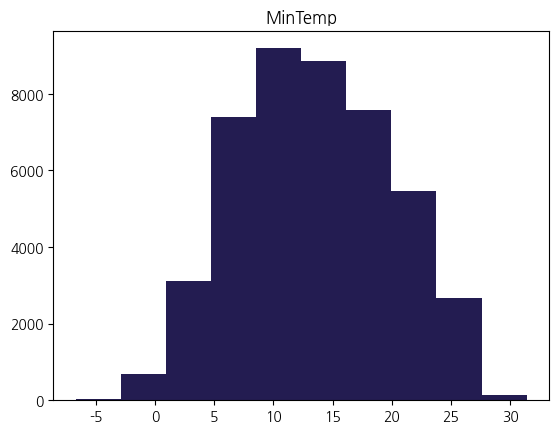

In [35]:
plt.hist(x=x_train_cont["MinTemp"],color=color_list[0])
plt.title("MinTemp")

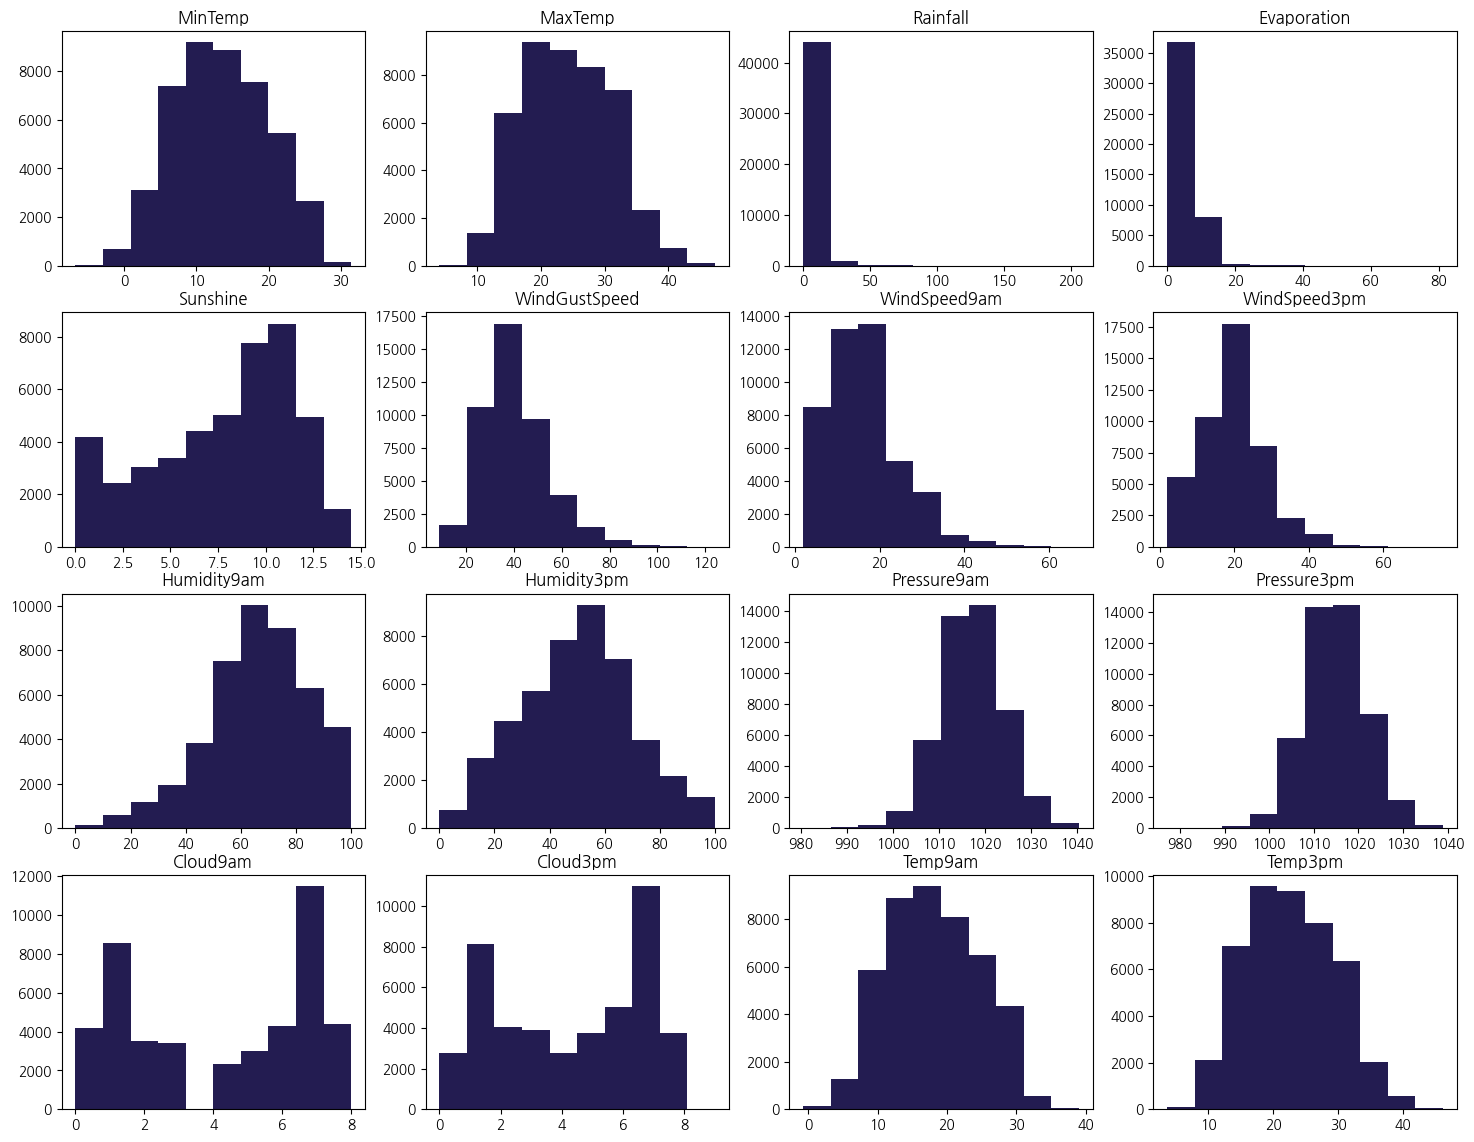

In [36]:
plt.figure(figsize=(18,14))

for i, column in enumerate(cont_column_list[:-1]):
    if i == 0:
        continue
    plt.subplot(4,4,i)
    plt.hist(x_train_cont[column], color=color_list[0])
    plt.title(f"{column}")

plt.savefig("./data/continous_describe.png")

In [37]:
category_column_list

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [38]:
#범주형 칼럼 카운트
from collections import Counter

loc_counter = Counter(x_train["Location"])
wind_gust_counter = Counter(x_train["WindGustDir"])
wind_dir9_counter = Counter(x_train["WindDir9am"])
wind_dir3_counter = Counter(x_train["WindDir3pm"])
rain_today_counter = Counter(x_train["RainToday"])

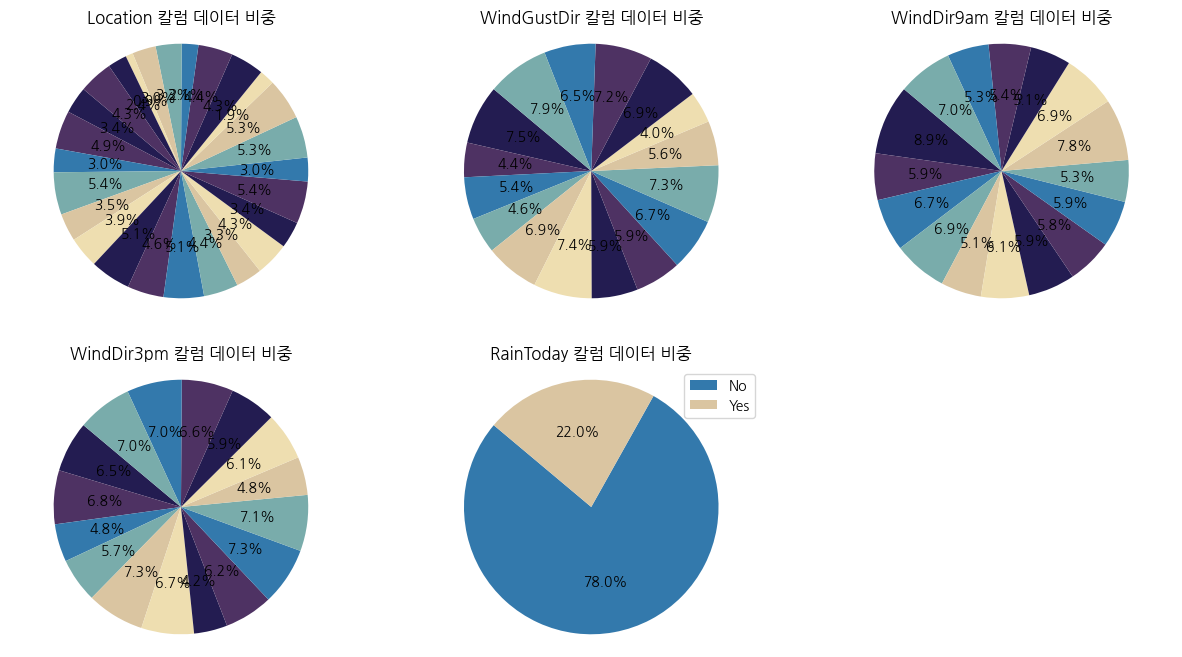

In [39]:
#범주형 칼럼 시각화
plt.figure(figsize=(15, 8))  # 전체 figure 크기 설정

plt.subplot(231)
plt.pie(loc_counter.values(), autopct='%1.1f%%', startangle=140, colors=color_list)
plt.axis('equal')  # 원의 형태를 유지함
plt.title("Location 칼럼 데이터 비중")
# plt.legend(loc_counter.keys())

plt.subplot(232)
plt.pie(wind_gust_counter.values(), autopct='%1.1f%%', startangle=140, colors=color_list)
plt.axis('equal')  # 원의 형태를 유지함
plt.title("WindGustDir 칼럼 데이터 비중")
# plt.legend(wind_gust_counter.keys())

plt.subplot(233)
plt.pie(wind_dir9_counter.values(), autopct='%1.1f%%', startangle=140, colors=color_list)
plt.axis('equal')  # 원의 형태를 유지함
plt.title("WindDir9am 칼럼 데이터 비중")
# plt.legend(wind_dir9_counter.keys())

plt.subplot(234)
plt.pie(wind_dir3_counter.values(), autopct='%1.1f%%', startangle=140, colors=color_list)
plt.axis('equal')  # 원의 형태를 유지함
plt.title("WindDir3pm 칼럼 데이터 비중")
# plt.legend(wind_dir3_counter.keys())

plt.subplot(235)
plt.pie(rain_today_counter.values(), autopct='%1.1f%%', startangle=140, colors=color_list[2:5:2])
plt.axis('equal')  # 원의 형태를 유지함
plt.title("RainToday 칼럼 데이터 비중")
plt.legend(rain_today_counter.keys())

plt.show()

In [40]:
x_train_cont["RainTomorrow"] = x_train_cont["RainTomorrow"].map({"No":0, "Yes":1})

In [41]:
x_train_categories["RainTomorrow"] = x_train_categories["RainTomorrow"].map({"No":0, "Yes":1})
y_train = y_train.map({"No":0, "Yes":1})
y_test = y_test.map({"No":0, "Yes":1})

In [42]:
import seaborn as sns

In [ ]:
sns.pairplot(data=x_train_cont)
plt.savefig("./data/cont_var_pairplot.png")
plt.show()

In [43]:
x_train_cont["RainTomorrow"] = y_train
x_train_categories["RainTomorrow"] = y_train

In [44]:
x_train_categories

,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
67563,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
139289,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
103262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
72413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
142256,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89186,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


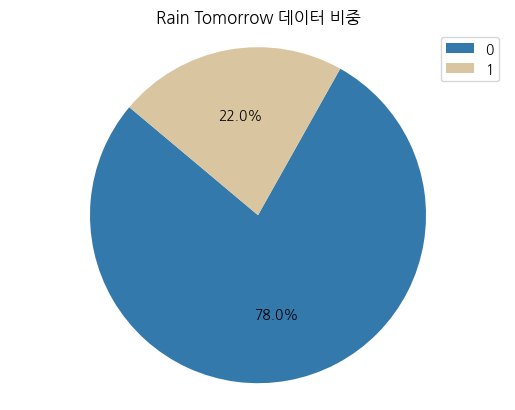

In [45]:
rain_counter = Counter(y_train)

plt.pie(rain_counter.values(), autopct='%1.1f%%', startangle=140, colors=color_list[2:6:2])
plt.axis('equal')  # 원의 형태를 유지함
plt.title("Rain Tomorrow 데이터 비중")
plt.legend(rain_counter.keys())

### 데이터 전처리

In [340]:
cont_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [252]:
x_train_cont = x_train[cont_list]

In [219]:
x_train_cont = x_train_cont.drop("Date", axis=1)

KeyError: "['Date'] not found in axis"

In [220]:
no_cloud = [x for x in x_train_cont.columns.to_list() if "Cloud" not in x]

In [221]:
no_cloud

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [222]:
x_train_cont

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
67563,5.600000,17.800000,0.000000,1.600000,7.000000,59.000000,31.000000,33.000000,76.000000,60.000000,1006.400000,1005.200000,6.000000,3.000000,13.000000,16.700000
79638,11.700000,24.000000,0.000000,7.400000,5.800000,57.000000,15.000000,26.000000,43.000000,36.000000,1011.800000,1007.300000,7.000000,1.000000,16.900000,23.300000
61512,15.600000,28.100000,4.400000,3.600000,4.000000,46.000000,9.000000,19.000000,73.000000,50.000000,1005.900000,1006.100000,4.000000,8.000000,21.300000,26.000000
139289,26.100000,33.200000,0.000000,4.400000,7.700000,31.000000,6.000000,19.000000,72.000000,61.000000,1007.600000,1005.000000,7.000000,7.000000,30.300000,32.100000
103262,11.500000,20.200000,0.000000,4.600000,5.000000,61.000000,26.000000,30.000000,64.000000,57.000000,1009.300000,1006.000000,7.000000,7.000000,15.100000,18.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,8.300000,17.600000,0.000000,5.200000,5.500000,31.000000,17.000000,7.000000,83.000000,52.000000,1025.000000,1022.300000,8.000000,4.000000,12.400000,17.100000
72413,12.100000,30.700000,0.000000,5.800000,11.000000,30.000000,19.000000,7.000000,69.000000,19.000000,1015.500000,1012.500000,0.000000,0.000000,15.000000,29.100000
142256,22.400000,33.200000,0.000000,6.800000,11.200000,46.000000,13.000000,20.000000,55.000000,26.000000,1013.800000,1010.100000,1.000000,1.000000,25.800000,32.800000
89186,19.700000,25.800000,0.200000,5.400000,5.200000,59.000000,24.000000,46.000000,77.000000,57.000000,1022.000000,1019.300000,7.000000,5.000000,21.400000,24.800000


In [232]:
x_train_cont_preprocessed = x_train_cont[no_cloud]

In [224]:
x_train_cont_preprocessed

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
67563,5.600000,17.800000,0.000000,1.600000,7.000000,59.000000,31.000000,33.000000,76.000000,60.000000,1006.400000,1005.200000,13.000000,16.700000
79638,11.700000,24.000000,0.000000,7.400000,5.800000,57.000000,15.000000,26.000000,43.000000,36.000000,1011.800000,1007.300000,16.900000,23.300000
61512,15.600000,28.100000,4.400000,3.600000,4.000000,46.000000,9.000000,19.000000,73.000000,50.000000,1005.900000,1006.100000,21.300000,26.000000
139289,26.100000,33.200000,0.000000,4.400000,7.700000,31.000000,6.000000,19.000000,72.000000,61.000000,1007.600000,1005.000000,30.300000,32.100000
103262,11.500000,20.200000,0.000000,4.600000,5.000000,61.000000,26.000000,30.000000,64.000000,57.000000,1009.300000,1006.000000,15.100000,18.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,8.300000,17.600000,0.000000,5.200000,5.500000,31.000000,17.000000,7.000000,83.000000,52.000000,1025.000000,1022.300000,12.400000,17.100000
72413,12.100000,30.700000,0.000000,5.800000,11.000000,30.000000,19.000000,7.000000,69.000000,19.000000,1015.500000,1012.500000,15.000000,29.100000
142256,22.400000,33.200000,0.000000,6.800000,11.200000,46.000000,13.000000,20.000000,55.000000,26.000000,1013.800000,1010.100000,25.800000,32.800000
89186,19.700000,25.800000,0.200000,5.400000,5.200000,59.000000,24.000000,46.000000,77.000000,57.000000,1022.000000,1019.300000,21.400000,24.800000


In [254]:
x_train_cont

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
20505,5.600000,17.800000,0.000000,1.600000,7.000000,59.000000,31.000000,33.000000,76.000000,60.000000,1006.400000,1005.200000,13.000000,16.700000
28027,11.700000,24.000000,0.000000,7.400000,5.800000,57.000000,15.000000,26.000000,43.000000,36.000000,1011.800000,1007.300000,16.900000,23.300000
15831,15.600000,28.100000,4.400000,3.600000,4.000000,46.000000,9.000000,19.000000,73.000000,50.000000,1005.900000,1006.100000,21.300000,26.000000
53510,26.100000,33.200000,0.000000,4.400000,7.700000,31.000000,6.000000,19.000000,72.000000,61.000000,1007.600000,1005.000000,30.300000,32.100000
40063,11.500000,20.200000,0.000000,4.600000,5.000000,61.000000,26.000000,30.000000,64.000000,57.000000,1009.300000,1006.000000,15.100000,18.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,8.300000,17.600000,0.000000,5.200000,5.500000,31.000000,17.000000,7.000000,83.000000,52.000000,1025.000000,1022.300000,12.400000,17.100000
23924,12.100000,30.700000,0.000000,5.800000,11.000000,30.000000,19.000000,7.000000,69.000000,19.000000,1015.500000,1012.500000,15.000000,29.100000
56373,22.400000,33.200000,0.000000,6.800000,11.200000,46.000000,13.000000,20.000000,55.000000,26.000000,1013.800000,1010.100000,25.800000,32.800000
34086,19.700000,25.800000,0.200000,5.400000,5.200000,59.000000,24.000000,46.000000,77.000000,57.000000,1022.000000,1019.300000,21.400000,24.800000


In [253]:
index_list = x_train_cont.index.to_list()

In [256]:
x_train_cont["Rainfall"] = np.log1p(x_train_cont["Rainfall"])
x_train_cont["Evaporation"] = np.log1p(x_train_cont["Evaporation"])

C:\Users\Jiu\AppData\Local\Temp\ipykernel_19704\2849314833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_cont["Rainfall"] = np.log1p(x_train_cont["Rainfall"])
C:\Users\Jiu\AppData\Local\Temp\ipykernel_19704\2849314833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_cont["Evaporation"] = np.log1p(x_train_cont["Evaporation"])


In [257]:
x_train_cont

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
20505,5.600000,17.800000,0.000000,0.955511,7.000000,59.000000,31.000000,33.000000,76.000000,60.000000,1006.400000,1005.200000,13.000000,16.700000
28027,11.700000,24.000000,0.000000,2.128232,5.800000,57.000000,15.000000,26.000000,43.000000,36.000000,1011.800000,1007.300000,16.900000,23.300000
15831,15.600000,28.100000,1.686399,1.526056,4.000000,46.000000,9.000000,19.000000,73.000000,50.000000,1005.900000,1006.100000,21.300000,26.000000
53510,26.100000,33.200000,0.000000,1.686399,7.700000,31.000000,6.000000,19.000000,72.000000,61.000000,1007.600000,1005.000000,30.300000,32.100000
40063,11.500000,20.200000,0.000000,1.722767,5.000000,61.000000,26.000000,30.000000,64.000000,57.000000,1009.300000,1006.000000,15.100000,18.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,8.300000,17.600000,0.000000,1.824549,5.500000,31.000000,17.000000,7.000000,83.000000,52.000000,1025.000000,1022.300000,12.400000,17.100000
23924,12.100000,30.700000,0.000000,1.916923,11.000000,30.000000,19.000000,7.000000,69.000000,19.000000,1015.500000,1012.500000,15.000000,29.100000
56373,22.400000,33.200000,0.000000,2.054124,11.200000,46.000000,13.000000,20.000000,55.000000,26.000000,1013.800000,1010.100000,25.800000,32.800000
34086,19.700000,25.800000,0.182322,1.856298,5.200000,59.000000,24.000000,46.000000,77.000000,57.000000,1022.000000,1019.300000,21.400000,24.800000


In [255]:
#로그 스케일링

for i in index_list:
    x_train_cont.loc[i, "Rainfall"] = np.log1p(x_train_cont.loc[i, "Rainfall"])
    x_train_cont.loc[i, "Evaporation"] = np.log1p(x_train_cont.loc[i, "Evaporation"])

C:\Users\Jiu\AppData\Local\Temp\ipykernel_19704\657236070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_cont_preprocessed.loc[i, "Rainfall"] = np.log1p(x_train_cont.loc[i, "Rainfall"])

KeyboardInterrupt



In [ ]:
x_train_cont_preprocessed

In [209]:
cont_list 

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [259]:
cont_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [260]:
#스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

x_train_cont[cont_list] = standard_scaler.fit_transform(x_train_cont[cont_list])

C:\Users\Jiu\AppData\Local\Temp\ipykernel_19704\1021368278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_cont[cont_list] = standard_scaler.fit_transform(x_train_cont[cont_list])


In [261]:
x_train_cont

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
20505,-1.227676,-0.922498,-0.534051,-1.335994,-0.197554,1.363624,1.842931,1.549699,0.549709,0.514329,-1.573435,-1.401428,-0.794297,-0.880320
28027,-0.275520,-0.031447,-0.534051,0.713985,-0.516966,1.213290,-0.076772,0.727647,-1.241376,-0.675572,-0.789733,-1.094906,-0.199209,0.086831
15831,0.333235,0.557796,1.377936,-0.338650,-0.996083,0.386450,-0.796661,-0.094405,0.386884,0.018537,-1.646000,-1.270061,0.472171,0.482483
53510,1.972192,1.290758,-0.534051,-0.058362,-0.011231,-0.741059,-1.156605,-0.094405,0.332608,0.563909,-1.399279,-1.430620,1.845450,1.376365
40063,-0.306738,-0.577575,-0.534051,0.005210,-0.729907,1.513959,1.243024,1.197391,-0.101594,0.365592,-1.152558,-1.284658,-0.473865,-0.675167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,-0.806230,-0.951242,-0.534051,0.183132,-0.596819,-0.741059,0.163191,-1.503636,0.929637,0.117696,1.125982,1.094539,-0.885849,-0.821705
23924,-0.213084,0.931463,-0.534051,0.344606,0.867150,-0.816227,0.403154,-1.503636,0.169782,-1.518418,-0.252752,-0.335898,-0.489124,0.936751
56373,1.394655,1.290758,-0.534051,0.584441,0.920385,0.386450,-0.316735,0.023031,-0.590072,-1.171364,-0.499473,-0.686209,1.158811,1.478942
34086,0.973209,0.227245,-0.327340,0.238630,-0.676671,1.363624,1.003061,3.076367,0.603985,0.365592,0.690592,0.656650,0.487430,0.306638


## **회귀 분석**

## Ver 1.0

### 변수 선택

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(
    x_train_cont.corr(),
    annot=True,
)
plt.title("연속형 변수 히트맵")
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(
    x_train_categories.corr(),
    annot=False,
)
plt.title("범주형 변수 히트맵")
plt.show()

In [47]:
x_train_cont = x_train_cont.drop("RainTomorrow",axis=1)

In [48]:
x_train_categories = x_train_categories.drop("RainTomorrow",axis=1)

In [49]:
x_train_concat = pd.concat([x_train_cont, x_train_categories], axis=1)

In [50]:
x_train_concat = x_train_concat.drop("Date",axis=1)

In [51]:
x_train_concat.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Location_AliceSprings', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Darwin', 'Location_Hobart',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Sale', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Townsville', 'Location_WaggaWagga',
       'Location_Watsonia', 'Location_Williamtown', 'Location_Woomera',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDi

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(x_train_concat.corr())
plt.show()

In [52]:
x_train_edit = x_train_concat.drop(["Location_Woomera","WindGustDir_WSW","WindDir3pm_WSW","WindDir9am_WSW"], axis=1)

### 로지스틱 회귀 모델 생성

In [ ]:
x_train

In [53]:
#회귀 모델 생성
import statsmodels.api as sm

x_constant_train = sm.add_constant(x_train_edit)
model = sm.Logit(y_train, x_constant_train)

result = model.fit()

Optimization terminated successfully.
         Current function value: 0.328243
         Iterations 7


In [54]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45048
Method:                           MLE   Df Model:                           87
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.3775
Time:                        10:31:52   Log-Likelihood:                -14816.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        53.5985      3.061     17.512      0.000      47.600      59.597
MinTemp                      -0.0188      0.009     -2.043      0.041      -0.037      -0.001
MaxTemp                       0.0003      0.014      0.020      0.984      -0.027       0.028
Rainfall                      0.0070      0.002      2.945      0.003       0.002       0.012
Evaporation                   0.0074      0.007      1.125      0.261      -0.006       0.020
Sunshine                     -0.1378      0.007    -19.338      0.000      -0.152      -0.124
WindGustSpeed                 0.0589      0.002     31.578      0.000       0.055       0.063
WindSpeed9am                 -0.0112      0.003     -4.382      0.000      -0.016      -0.006
WindSpeed3pm                 -0.0207      0.003     -7.837      0.000      -0.026      -0.016
Humidity9am                   0.0022      0.002      1.191      0.234      -0.001       0.006
Humidity3pm                   0.0577      0.002     29.640      0.000       0.054       0.062
Pressure9am                   0.1436      0.011     13.510      0.000       0.123       0.164
Pressure3pm                  -0.2034      0.011    -19.030      0.000      -0.224      -0.182
Cloud9am                     -0.0102      0.009     -1.187      0.235      -0.027       0.007
Cloud3pm                      0.1263      0.009     13.528      0.000       0.108       0.145
Temp9am                       0.0189      0.013      1.411      0.158      -0.007       0.045
Temp3pm                       0.0049      0.015      0.318      0.750      -0.025       0.035
Location_AliceSprings        -0.0412      0.178     -0.232      0.817      -0.390       0.307
Location_Brisbane             0.6393      0.158      4.050      0.000       0.330       0.949
Location_Cairns               0.3021      0.162      1.866      0.062      -0.015       0.619
Location_Canberra             0.0684      0.177      0.386      0.699      -0.279       0.415
Location_Cobar                0.0889      0.247      0.360      0.719      -0.395       0.573
Location_CoffsHarbour         0.3185      0.165      1.929      0.054      -0.005       0.642
Location_Darwin              -0.2033      0.163     -1.251      0.211      -0.522       0.115
Location_Hobart              -0.4245      0.161     -2.637      0.008      -0.740      -0.109
Location_Melbourne           -0.0110      0.156     -0.071      0.944      -0.316       0.294
Location_MelbourneAirport    -0.3450      0.152     -2.276      0.023      -0.642      -0.048
Location_Mildura              0.0144      0.163      0.088      0.930      -0.305       0.333
Location_Moree                0.1699      0.167      1.019      0.308      -0.157       0.497
Location_MountGambier         0.1725      0.152      1.135      0.256      -0.125       0.470
Location_NorfolkIsland       -0.0256      0.155     -0.164      0.869      -0.330       0.279
Location_Nuriootpa            0.1045      0.1

### 회귀 계수 해석

In [332]:
import numpy as np

In [56]:
# 출력 옵션 설정
pd.options.display.float_format = '{:.6f}'.format

print(np.exp(result.params).to_string())

const                       189470163896764540649472.000000
MinTemp                                            0.981340
MaxTemp                                            1.000287
Rainfall                                           1.007014
Evaporation                                        1.007476
Sunshine                                           0.871277
WindGustSpeed                                      1.060628
WindSpeed9am                                       0.988904
WindSpeed3pm                                       0.979500
Humidity9am                                        1.002212
Humidity3pm                                        1.059419
Pressure9am                                        1.154367
Pressure3pm                                        0.815976
Cloud9am                                           0.989856
Cloud3pm                                           1.134669
Temp9am                                            1.019070
Temp3pm                                 

### 로지스틱 회귀 분석: 모든 범주형 변수 

In [58]:
x_train_categories

,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday
67563,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
139289,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
103262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
72413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
142256,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89186,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
x_train_ctg_edit = x_train_categories.drop(["Location_Woomera","WindGustDir_WSW","WindDir3pm_WSW","WindDir9am_WSW"], axis=1)

In [61]:
x_train_ctg_edit

,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,RainToday
67563,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
139289,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
103262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142256,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89186,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [97]:
#회귀 모델 생성
import statsmodels.api as sm

x_constant_train = sm.add_constant(x_train_ctg_edit)
model = sm.Logit(y_train, x_constant_train)

result = model.fit()

Optimization terminated successfully.
         Current function value: 0.464460
         Iterations 7


In [98]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45064
Method:                           MLE   Df Model:                           71
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.1191
Time:                        13:27:01   Log-Likelihood:                -20964.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.0126      0.131    -23.067      0.000      -3.269      -2.757
Location_AliceSprings         0.3125      0.139      2.249      0.025       0.040       0.585
Location_Brisbane             1.2814      0.123     10.438      0.000       1.041       1.522
Location_Cairns               1.6995      0.124     13.688      0.000       1.456       1.943
Location_Canberra             0.8625      0.142      6.091      0.000       0.585       1.140
Location_Cobar                0.4678      0.191      2.453      0.014       0.094       0.842
Location_CoffsHarbour         1.4941      0.131     11.410      0.000       1.237       1.751
Location_Darwin               1.1393      0.120      9.467      0.000       0.903       1.375
Location_Hobart               0.9705      0.128      7.606      0.000       0.720       1.221
Location_Melbourne            0.9246      0.126      7.340      0.000       0.678       1.172
Location_MelbourneAirport     0.8588      0.122      7.066      0.000       0.621       1.097
Location_Mildura              0.2623      0.131      2.003      0.045       0.006       0.519
Location_Moree                0.5948      0.133      4.477      0.000       0.334       0.855
Location_MountGambier         1.2403      0.120     10.302      0.000       1.004       1.476
Location_NorfolkIsland        1.5668      0.121     12.966      0.000       1.330       1.804
Location_Nuriootpa            0.9233      0.127      7.263      0.000       0.674       1.172
Location_Perth                1.0949      0.121      9.013      0.000       0.857       1.333
Location_PerthAirport         0.9378      0.123      7.626      0.000       0.697       1.179
Location_Portland             1.6422      0.123     13.375      0.000       1.402       1.883
Location_Sale                 1.0412      0.130      7.989      0.000       0.786       1.297
Location_Sydney               1.2454      0.129      9.628      0.000       0.992       1.499
Location_SydneyAirport        1.1805      0.121      9.720      0.000       0.942       1.419
Location_Townsville           1.0789      0.129      8.336      0.000       0.825       1.333
Location_WaggaWagga           0.8502      0.126      6.726      0.000       0.602       1.098
Location_Watsonia             1.1080      0.120      9.200      0.000       0.872       1.344
Location_Williamtown          1.2037      0.135      8.929      0.000       0.940       1.468
WindGustDir_E                -0.3119      0.079     -3.966      0.000      -0.466      -0.158
WindGustDir_ENE              -0.4987      0.081     -6.162      0.000      -0.657      -0.340
WindGustDir_ESE              -0.2056      0.083     -2.487      0.013      -0.368      -0.044
WindGustDir_N                -0.1601      0.074     -2.162      0.031      -0.305      -0.015
WindGustDir_NE               -0.4530      0.083     -5.466      0.000      -0.615      -0.291
WindGustDir_NNE              -0.2580      0.0

In [99]:
# 출력 옵션 설정
pd.options.display.float_format = '{:.6f}'.format

print("각 회귀 계수별 오즈 변화")
print(np.exp(result.params).to_string())

각 회귀 계수별 오즈 변화
const                       0.049163
Location_AliceSprings       1.366788
Location_Brisbane           3.601827
Location_Cairns             5.471121
Location_Canberra           2.369103
Location_Cobar              1.596522
Location_CoffsHarbour       4.455257
Location_Darwin             3.124588
Location_Hobart             2.639210
Location_Melbourne          2.520963
Location_MelbourneAirport   2.360338
Location_Mildura            1.299955
Location_Moree              1.812619
Location_MountGambier       3.456809
Location_NorfolkIsland      4.791211
Location_Nuriootpa          2.517641
Location_Perth              2.989009
Location_PerthAirport       2.554327
Location_Portland           5.166672
Location_Sale               2.832615
Location_Sydney             3.474234
Location_SydneyAirport      3.255916
Location_Townsville         2.941377
Location_WaggaWagga         2.340029
Location_Watsonia           3.028249
Location_Williamtown        3.332475
WindGustDir_E          

In [100]:
#다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [102]:
x_constant_train

,const,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,RainToday
67563,1.000000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79638,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61512,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
139289,1.000000,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
103262,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72413,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142256,1.000000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
89186,1.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [103]:
x_constant_train = x_constant_train.drop("const", axis=1)

In [104]:
print(check_multi_colinearity(x_constant_train).to_string())

                     Features      VIF
25              WindGustDir_E 2.980834
28              WindGustDir_N 2.926283
56             WindDir3pm_ENE 2.851424
43               WindDir9am_N 2.851330
26            WindGustDir_ENE 2.833108
64              WindDir3pm_SE 2.709366
40               WindDir9am_E 2.682552
34             WindGustDir_SE 2.670333
55               WindDir3pm_E 2.598077
59              WindDir3pm_NE 2.594238
58               WindDir3pm_N 2.544288
57             WindDir3pm_ESE 2.516047
63               WindDir3pm_S 2.512426
41             WindDir9am_ENE 2.490639
27            WindGustDir_ESE 2.461350
29             WindGustDir_NE 2.445362
50             WindDir9am_SSE 2.433145
49              WindDir9am_SE 2.377467
33              WindGustDir_S 2.351685
35            WindGustDir_SSE 2.304070
65             WindDir3pm_SSE 2.250016
42             WindDir9am_ESE 2.222134
36            WindGustDir_SSW 2.216123
44              WindDir9am_NE 2.211901
45             WindDir9am

#### 유의미한 회귀 계수만 2차 분석

In [82]:
except_str = """
WindGustDir_NNW
WindGustDir_S
WindGustDir_SSE
WindGustDir_SSW
WindGustDir_SW
WindGustDir_W
WindGustDir_WNW
WindDir9am_E
WindDir9am_ENE
WindDir9am_ESE
WindDir9am_S
WindDir9am_SSE
WindDir9am_SSW
WindDir9am_SW
WindDir3pm_E
WindDir3pm_S
WindDir3pm_SE
WindDir3pm_SSE
WindDir3pm_SSW
"""

In [89]:
except_list = except_str.split("\n")

In [90]:
del except_list[0]
del except_list[-1]

In [91]:
except_list

['WindGustDir_NNW',
 'WindGustDir_S',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_S',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir3pm_E',
 'WindDir3pm_S',
 'WindDir3pm_SE',
 'WindDir3pm_SSE',
 'WindDir3pm_SSW']

In [92]:
x_train_ctg_edit = x_train_ctg_edit.drop(except_list, axis=1)

In [93]:
x_constant_train = sm.add_constant(x_train_ctg_edit)
model = sm.Logit(y_train, x_constant_train)

result = model.fit()

Optimization terminated successfully.
         Current function value: 0.464882
         Iterations 7


In [94]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45083
Method:                           MLE   Df Model:                           52
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.1183
Time:                        13:19:15   Log-Likelihood:                -20983.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.0323      0.110    -27.499      0.000      -3.248      -2.816
Location_AliceSprings         0.3348      0.139      2.417      0.016       0.063       0.606
Location_Brisbane             1.2702      0.121     10.487      0.000       1.033       1.508
Location_Cairns               1.6668      0.122     13.715      0.000       1.429       1.905
Location_Canberra             0.8484      0.141      6.012      0.000       0.572       1.125
Location_Cobar                0.4831      0.190      2.536      0.011       0.110       0.856
Location_CoffsHarbour         1.4889      0.129     11.534      0.000       1.236       1.742
Location_Darwin               1.1402      0.120      9.495      0.000       0.905       1.376
Location_Hobart               0.9733      0.127      7.679      0.000       0.725       1.222
Location_Melbourne            0.9319      0.126      7.425      0.000       0.686       1.178
Location_MelbourneAirport     0.8696      0.121      7.193      0.000       0.633       1.107
Location_Mildura              0.2651      0.131      2.027      0.043       0.009       0.521
Location_Moree                0.6129      0.133      4.624      0.000       0.353       0.873
Location_MountGambier         1.2420      0.120     10.333      0.000       1.006       1.478
Location_NorfolkIsland        1.5775      0.120     13.095      0.000       1.341       1.814
Location_Nuriootpa            0.9433      0.127      7.448      0.000       0.695       1.191
Location_Perth                1.1058      0.121      9.142      0.000       0.869       1.343
Location_PerthAirport         0.9579      0.122      7.828      0.000       0.718       1.198
Location_Portland             1.6438      0.122     13.434      0.000       1.404       1.884
Location_Sale                 1.0646      0.130      8.209      0.000       0.810       1.319
Location_Sydney               1.2683      0.128      9.884      0.000       1.017       1.520
Location_SydneyAirport        1.1968      0.121      9.926      0.000       0.960       1.433
Location_Townsville           1.0591      0.129      8.221      0.000       0.807       1.312
Location_WaggaWagga           0.8888      0.126      7.082      0.000       0.643       1.135
Location_Watsonia             1.1280      0.120      9.395      0.000       0.893       1.363
Location_Williamtown          1.2438      0.134      9.292      0.000       0.981       1.506
WindGustDir_E                -0.2102      0.055     -3.793      0.000      -0.319      -0.102
WindGustDir_ENE              -0.3844      0.062     -6.201      0.000      -0.506      -0.263
WindGustDir_ESE              -0.1346      0.062     -2.164      0.030      -0.256      -0.013
WindGustDir_N                -0.0746      0.055     -1.354      0.176      -0.183       0.033
WindGustDir_NE               -0.3540      0.066     -5.343      0.000      -0.484      -0.224
WindGustDir_NNE              -0.1688      0.0

In [105]:
x_train_ctg_edit = x_train_ctg_edit.drop(["WindDir3pm_ESE","WindGustDir_NW","WindGustDir_N"], axis=1)

In [106]:
x_train_ctg_edit

,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,RainToday
67563,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
139289,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
103262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142256,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89186,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [107]:
x_constant_train = sm.add_constant(x_train_ctg_edit)
model = sm.Logit(y_train, x_constant_train)

result = model.fit()

Optimization terminated successfully.
         Current function value: 0.464555
         Iterations 7


In [108]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45067
Method:                           MLE   Df Model:                           68
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.1189
Time:                        13:35:38   Log-Likelihood:                -20968.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.0022      0.126    -23.734      0.000      -3.250      -2.754
Location_AliceSprings         0.3230      0.139      2.328      0.020       0.051       0.595
Location_Brisbane             1.2958      0.123     10.574      0.000       1.056       1.536
Location_Cairns               1.7121      0.124     13.817      0.000       1.469       1.955
Location_Canberra             0.8699      0.141      6.155      0.000       0.593       1.147
Location_Cobar                0.4737      0.191      2.485      0.013       0.100       0.847
Location_CoffsHarbour         1.5090      0.131     11.550      0.000       1.253       1.765
Location_Darwin               1.1369      0.120      9.454      0.000       0.901       1.373
Location_Hobart               0.9927      0.127      7.811      0.000       0.744       1.242
Location_Melbourne            0.9148      0.126      7.275      0.000       0.668       1.161
Location_MelbourneAirport     0.8459      0.121      6.978      0.000       0.608       1.083
Location_Mildura              0.2621      0.131      2.002      0.045       0.006       0.519
Location_Moree                0.6018      0.133      4.533      0.000       0.342       0.862
Location_MountGambier         1.2413      0.120     10.315      0.000       1.005       1.477
Location_NorfolkIsland        1.5756      0.121     13.050      0.000       1.339       1.812
Location_Nuriootpa            0.9270      0.127      7.299      0.000       0.678       1.176
Location_Perth                1.0964      0.121      9.032      0.000       0.858       1.334
Location_PerthAirport         0.9360      0.123      7.623      0.000       0.695       1.177
Location_Portland             1.6468      0.123     13.417      0.000       1.406       1.887
Location_Sale                 1.0532      0.130      8.088      0.000       0.798       1.308
Location_Sydney               1.2677      0.129      9.839      0.000       1.015       1.520
Location_SydneyAirport        1.1959      0.121      9.866      0.000       0.958       1.433
Location_Townsville           1.0856      0.129      8.395      0.000       0.832       1.339
Location_WaggaWagga           0.8519      0.126      6.746      0.000       0.604       1.099
Location_Watsonia             1.1056      0.120      9.186      0.000       0.870       1.341
Location_Williamtown          1.2214      0.134      9.082      0.000       0.958       1.485
WindGustDir_E                -0.2212      0.066     -3.356      0.001      -0.350      -0.092
WindGustDir_ENE              -0.4116      0.068     -6.017      0.000      -0.546      -0.278
WindGustDir_ESE              -0.1088      0.070     -1.553      0.120      -0.246       0.028
WindGustDir_NE               -0.3644      0.070     -5.242      0.000      -0.501      -0.228
WindGustDir_NNE              -0.1627      0.067     -2.430      0.015      -0.294      -0.031
WindGustDir_NNW              -0.0767      0.0

In [95]:
x_constant_train

,const,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,...,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,RainToday
67563,1.000000,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
79638,1.000000,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
61512,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
139289,1.000000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
103262,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72413,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142256,1.000000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
89186,1.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
except_list.extend(["WindDir3pm_ESE","WindGustDir_NW","WindGustDir_N"])

In [112]:
except_list

['WindGustDir_NNW',
 'WindGustDir_S',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_S',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir3pm_E',
 'WindDir3pm_S',
 'WindDir3pm_SE',
 'WindDir3pm_SSE',
 'WindDir3pm_SSW',
 'WindDir3pm_ESE',
 'WindGustDir_NW',
 'WindGustDir_N']

#### 유의미한 회귀 계수 재분석 (3차)

In [114]:
third_except = """WindGustDir_ESE
WindGustDir_NNW
WindGustDir_S
WindGustDir_SE
WindGustDir_SSE
WindGustDir_SSW
WindGustDir_SW
WindGustDir_SW
WindGustDir_WNW
WindDir9am_E
WindDir9am_ESE
WindDir9am_S
WindDir9am_SSW
WindDir9am_SW
WindDir3pm_E
WindDir3pm_S
WindDir3pm_SE
WindDir3pm_SSE
WindDir3pm_SSW"""

In [115]:
except_list.extend(third_except.split("\n"))

In [116]:
except_list

['WindGustDir_NNW',
 'WindGustDir_S',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_S',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir3pm_E',
 'WindDir3pm_S',
 'WindDir3pm_SE',
 'WindDir3pm_SSE',
 'WindDir3pm_SSW',
 'WindDir3pm_ESE',
 'WindGustDir_NW',
 'WindGustDir_N',
 'WindGustDir_ESE',
 'WindGustDir_NNW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_SW',
 'WindGustDir_WNW',
 'WindDir9am_E',
 'WindDir9am_ESE',
 'WindDir9am_S',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir3pm_E',
 'WindDir3pm_S',
 'WindDir3pm_SE',
 'WindDir3pm_SSE',
 'WindDir3pm_SSW']

In [118]:
x_train_categories

,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday
67563,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
139289,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
103262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
72413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
142256,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89186,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [119]:
x_train_ctg_edit = x_train_categories.drop(except_list, axis=1)

x_constant_train = sm.add_constant(x_train_ctg_edit)
model = sm.Logit(y_train, x_constant_train)

result = model.fit()

Optimization terminated successfully.
         Current function value: 0.464940
         Iterations 7


In [120]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45084
Method:                           MLE   Df Model:                           51
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.1182
Time:                        13:47:32   Log-Likelihood:                -20986.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.9752      5e+04  -3.95e-05      1.000   -9.79e+04    9.79e+04
Location_AliceSprings        -0.7664      5e+04  -1.53e-05      1.000   -9.79e+04    9.79e+04
Location_Brisbane             0.1752      5e+04   3.51e-06      1.000   -9.79e+04    9.79e+04
Location_Cairns               0.5624      5e+04   1.13e-05      1.000   -9.79e+04    9.79e+04
Location_Canberra            -0.2259      5e+04  -4.52e-06      1.000   -9.79e+04    9.79e+04
Location_Cobar               -0.5932      5e+04  -1.19e-05      1.000   -9.79e+04    9.79e+04
Location_CoffsHarbour         0.4006      5e+04   8.02e-06      1.000   -9.79e+04    9.79e+04
Location_Darwin               0.0525      5e+04   1.05e-06      1.000   -9.79e+04    9.79e+04
Location_Hobart              -0.1022      5e+04  -2.05e-06      1.000   -9.79e+04    9.79e+04
Location_Melbourne           -0.1587      5e+04  -3.18e-06      1.000   -9.79e+04    9.79e+04
Location_MelbourneAirport    -0.2237      5e+04  -4.48e-06      1.000   -9.79e+04    9.79e+04
Location_Mildura             -0.8126      5e+04  -1.63e-05      1.000   -9.79e+04    9.79e+04
Location_Moree               -0.4651      5e+04  -9.31e-06      1.000   -9.79e+04    9.79e+04
Location_MountGambier         0.1668      5e+04   3.34e-06      1.000   -9.79e+04    9.79e+04
Location_NorfolkIsland        0.4879      5e+04   9.77e-06      1.000   -9.79e+04    9.79e+04
Location_Nuriootpa           -0.1362      5e+04  -2.73e-06      1.000   -9.79e+04    9.79e+04
Location_Perth                0.0379      5e+04   7.59e-07      1.000   -9.79e+04    9.79e+04
Location_PerthAirport        -0.1100      5e+04   -2.2e-06      1.000   -9.79e+04    9.79e+04
Location_Portland             0.5645      5e+04   1.13e-05      1.000   -9.79e+04    9.79e+04
Location_Sale                -0.0231      5e+04  -4.61e-07      1.000   -9.79e+04    9.79e+04
Location_Sydney               0.1823      5e+04   3.65e-06      1.000   -9.79e+04    9.79e+04
Location_SydneyAirport        0.1114      5e+04   2.23e-06      1.000   -9.79e+04    9.79e+04
Location_Townsville          -0.0340      5e+04   -6.8e-07      1.000   -9.79e+04    9.79e+04
Location_WaggaWagga          -0.1839      5e+04  -3.68e-06      1.000   -9.79e+04    9.79e+04
Location_Watsonia             0.0463      5e+04   9.27e-07      1.000   -9.79e+04    9.79e+04
Location_Williamtown          0.1517      5e+04   3.04e-06      1.000   -9.79e+04    9.79e+04
Location_Woomera             -1.0798      5e+04  -2.16e-05      1.000   -9.79e+04    9.79e+04
WindGustDir_E                -0.1660      0.054     -3.102      0.002      -0.271      -0.061
WindGustDir_ENE              -0.3412      0.060     -5.662      0.000      -0.459      -0.223
WindGustDir_NE               -0.3137      0.064     -4.871      0.000      -0.440      -0.187
WindGustDir_NNE              -0.1293      0.064     -2.024      0.043      -0.254      -0.004
WindGustDir_WSW               0.0729      0.0

In [121]:
check_multi_colinearity(x_train_ctg_edit)

,Features,VIF
31,WindDir9am_N,1.471542
40,WindDir3pm_ENE,1.442514
42,WindDir3pm_NE,1.433057
21,Location_Townsville,1.382719
41,WindDir3pm_N,1.356163
28,WindGustDir_NE,1.353285
6,Location_Darwin,1.348881
27,WindGustDir_ENE,1.344771
47,WindDir3pm_W,1.330563
49,WindDir3pm_WSW,1.329265


#### 유의미한 회귀 계수 재분석 (4차): 바람 방향+오늘 비

In [124]:
columns = x_train_categories.columns.to_list()

In [125]:
wind_rain_column = [x for x in columns if not "Location" in x]

In [126]:
x_train_ctg_edit = x_train_categories[wind_rain_column]

In [127]:
x_train_ctg_edit

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday
67563,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79638,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
139289,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
103262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62853,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
72413,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
142256,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89186,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [135]:
def train_logistic_regression(column_list):
    x_train_edit = x_train_concat[column_list]

    x_constant_train = sm.add_constant(x_train_edit)
    model = sm.Logit(y_train, x_constant_train)

    result = model.fit()
    
    return result

In [158]:
result = train_logistic_regression(wind_rain_column)

Optimization terminated successfully.
         Current function value: 0.473109
         Iterations 8


In [159]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45087
Method:                           MLE   Df Model:                           48
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.1027
Time:                        14:25:55   Log-Likelihood:                -21354.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4735    6.7e+04   -2.2e-05      1.000   -1.31e+05    1.31e+05
WindGustDir_E      -0.2450   2.15e+05  -1.14e-06      1.000   -4.21e+05    4.21e+05
WindGustDir_ENE    -0.4137   2.15e+05  -1.92e-06      1.000   -4.21e+05    4.21e+05
WindGustDir_ESE    -0.1809   2.15e+05  -8.41e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_N      -0.1277   2.15e+05  -5.94e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_NE     -0.3591   2.15e+05  -1.67e-06      1.000   -4.21e+05    4.21e+05
WindGustDir_NNE    -0.1748   2.15e+05  -8.13e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_NNW    -0.0936   2.15e+05  -4.35e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_NW      0.0340   2.15e+05   1.58e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_S       0.0098   2.15e+05   4.55e-08      1.000   -4.21e+05    4.21e+05
WindGustDir_SE     -0.0671   2.15e+05  -3.12e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_SSE     0.0216   2.15e+05      1e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_SSW     0.0219   2.15e+05   1.02e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_SW     -0.0766   2.15e+05  -3.56e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_W       0.0280   2.15e+05    1.3e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_WNW     0.1064   2.15e+05   4.95e-07      1.000   -4.21e+05    4.21e+05
WindGustDir_WSW     0.0431   2.15e+05   2.01e-07      1.000   -4.21e+05    4.21e+05
WindDir9am_E       -0.3469   2.54e+05  -1.36e-06      1.000   -4.99e+05    4.99e+05
WindDir9am_ENE     -0.1565   2.54e+05  -6.15e-07      1.000   -4.99e+05    4.99e+05
WindDir9am_ESE     -0.4014   2.54e+05  -1.58e-06      1.000   -4.99e+05    4.99e+05
WindDir9am_N        0.3639   2.54e+05   1.43e-06      1.000   -4.99e+05    4.99e+05
WindDir9am_NE       0.0248   2.54e+05   9.75e-08      1.000   -4.99e+05    4.99e+05
WindDir9am_NNE      0.3280   2.54e+05   1.29e-06      1.000   -4.99e+05    4.99e+05
WindDir9am_NNW      0.1993   2.54e+05   7.83e-07      1.000   -4.99e+05    4.99e+05
WindDir9am_NW       0.0581   2.54e+05   2.28e-07      1.000   -4.99e+05    4.99e+05
WindDir9am_S       -0.2380   2.54e+05  -9.35e-07      1.000   -4.99e+05    4.99e+05
WindDir9am_SE      -0.4003   2.54e+05  -1.57e-06      1.000   -4.99e+05    4.99e+05
WindDir9am_SSE     -0.2213   2.54e+05   -8.7e-07      1.000   -4.99e+05    4.99e+05
WindDir9am_SSW     -0.2633   2.54e+05  -1.03e-06      1.000   -4.99e+05    4.99e+05
WindDir9am_SW      -0.2317   2.54e+05  -9.11e-07      1.000   -4.99e+05    4.99e+05
WindDir9am_W       -0.0020   2.54e+05     -8e-09      1.000   -4.99e+05    4.99e+05
WindDir9am_WNW     -0.0287   2.54e+05  -1.13e-07      1.000   -4.99e+05    4.99e+05
WindDir9am_WSW     -0.1574   2.54e+05  -6.18e-07      1.000   -4.99e+05    4.99e+05
WindDir3pm_E       -0.0786   2.76e+05  -2.85e-07      1.000    -5.4e+05     5.4e+05
WindDir3pm_ENE     -0.0282   2.76e+05  -1.02e-07      1.000    -5.4e+05     5.4e+05
WindDir3pm_ESE     -0.0846   2.76e+05  -3.07e-07 

In [160]:
category_list = x_train_categories.columns.to_list()

In [161]:
result = train_logistic_regression(category_list)
result.summary()

Optimization terminated successfully.
         Current function value: 0.464460
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45063
Method:                           MLE   Df Model:                           72
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.1191
Time:                        14:26:25   Log-Likelihood:                -20964.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.4656        nan        nan        nan         nan         nan
Location_AliceSprings        -0.7432   2.03e+05  -3.65e-06      1.000   -3.99e+05    3.99e+05
Location_Brisbane             0.2258   2.03e+05   1.11e-06      1.000   -3.99e+05    3.99e+05
Location_Cairns               0.6438   2.03e+05   3.17e-06      1.000   -3.99e+05    3.99e+05
Location_Canberra            -0.1931   2.03e+05   -9.5e-07      1.000   -3.99e+05    3.99e+05
Location_Cobar               -0.5878   2.03e+05  -2.89e-06      1.000   -3.99e+05    3.99e+05
Location_CoffsHarbour         0.4384   2.03e+05   2.16e-06      1.000   -3.99e+05    3.99e+05
Location_Darwin               0.0837   2.03e+05   4.11e-07      1.000   -3.99e+05    3.99e+05
Location_Hobart              -0.0852   2.03e+05  -4.19e-07      1.000   -3.99e+05    3.99e+05
Location_Melbourne           -0.1310   2.03e+05  -6.44e-07      1.000   -3.99e+05    3.99e+05
Location_MelbourneAirport    -0.1968   2.03e+05  -9.68e-07      1.000   -3.99e+05    3.99e+05
Location_Mildura             -0.7933   2.03e+05   -3.9e-06      1.000   -3.99e+05    3.99e+05
Location_Moree               -0.4609   2.03e+05  -2.27e-06      1.000   -3.99e+05    3.99e+05
Location_MountGambier         0.1847   2.03e+05   9.08e-07      1.000   -3.99e+05    3.99e+05
Location_NorfolkIsland        0.5111   2.03e+05   2.51e-06      1.000   -3.99e+05    3.99e+05
Location_Nuriootpa           -0.1323   2.03e+05  -6.51e-07      1.000   -3.99e+05    3.99e+05
Location_Perth                0.0393   2.03e+05   1.93e-07      1.000   -3.99e+05    3.99e+05
Location_PerthAirport        -0.1179   2.03e+05  -5.79e-07      1.000   -3.99e+05    3.99e+05
Location_Portland             0.5866   2.03e+05   2.88e-06      1.000   -3.99e+05    3.99e+05
Location_Sale                -0.0145   2.03e+05   -7.1e-08      1.000   -3.99e+05    3.99e+05
Location_Sydney               0.1897   2.03e+05   9.33e-07      1.000   -3.99e+05    3.99e+05
Location_SydneyAirport        0.1248   2.03e+05   6.14e-07      1.000   -3.99e+05    3.99e+05
Location_Townsville           0.0232   2.03e+05   1.14e-07      1.000   -3.99e+05    3.99e+05
Location_WaggaWagga          -0.2055   2.03e+05  -1.01e-06      1.000   -3.99e+05    3.99e+05
Location_Watsonia             0.0523   2.03e+05   2.57e-07      1.000   -3.99e+05    3.99e+05
Location_Williamtown          0.1481   2.03e+05   7.28e-07      1.000   -3.99e+05    3.99e+05
Location_Woomera             -1.0557   2.03e+05  -5.19e-06      1.000   -3.99e+05    3.99e+05
WindGustDir_E                -0.2485        nan        nan        nan         nan         nan
WindGustDir_ENE              -0.4353        nan        nan        nan         nan         nan
WindGustDir_ESE              -0.1422        nan        nan        nan         nan         nan
WindGustDir_N                -0.0967        nan        nan        nan         nan         nan
WindGustDir_NE               -0.3895        n

순서형 변수인 Cloud 추가

### 연속형 변수 로지스틱 분석

In [169]:
cont_list = x_train_cont.columns.to_list()

In [170]:
cont_list = [x for x in cont_list if "Pressure" not in x]

In [173]:
cont_list = cont_list[1:]

In [174]:
cont_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [175]:
result = train_logistic_regression(cont_list)

Optimization terminated successfully.
         Current function value: 0.347153
         Iterations 7


In [176]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45121
Method:                           MLE   Df Model:                           14
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.3416
Time:                        14:36:26   Log-Likelihood:                -15669.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.9500      0.185    -43.063      0.000      -8.312      -7.588
MinTemp          -0.0444      0.008     -5.529      0.000      -0.060      -0.029
MaxTemp           0.0090      0.013      0.692      0.489      -0.017       0.035
Rainfall          0.0240      0.002     11.114      0.000       0.020       0.028
Evaporation      -0.0299      0.006     -4.684      0.000      -0.042      -0.017
Sunshine         -0.1468      0.007    -22.313      0.000      -0.160      -0.134
WindGustSpeed     0.0731      0.002     43.867      0.000       0.070       0.076
WindSpeed9am     -0.0213      0.002     -9.247      0.000      -0.026      -0.017
WindSpeed3pm     -0.0282      0.002    -11.742      0.000      -0.033      -0.024
Humidity9am       0.0014      0.002      0.804      0.421      -0.002       0.005
Humidity3pm       0.0606      0.002     33.544      0.000       0.057       0.064
Cloud9am         -0.0081      0.008     -1.003      0.316      -0.024       0.008
Cloud3pm          0.1257      0.009     14.060      0.000       0.108       0.143
Temp9am           0.0192      0.012      1.619      0.105      -0.004       0.042
Temp3pm           0.0715      0.014      5.093      0.000       0.044       0.099
=================================================================================
"""

In [180]:
cont_list = [x for x in cont_list if x not in ['Temp9am', 'MaxTemp', 'Humidity9am','Cloud9am',]]

In [182]:
result = train_logistic_regression(cont_list)
result.summary()

Optimization terminated successfully.
         Current function value: 0.347219
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45125
Method:                           MLE   Df Model:                           10
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.3415
Time:                        14:45:24   Log-Likelihood:                -15672.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.0230      0.161    -49.773      0.000      -8.339      -7.707
MinTemp          -0.0357      0.006     -6.376      0.000      -0.047      -0.025
Rainfall          0.0237      0.002     11.295      0.000       0.020       0.028
Evaporation      -0.0285      0.006     -4.733      0.000      -0.040      -0.017
Sunshine         -0.1415      0.006    -23.953      0.000      -0.153      -0.130
WindGustSpeed     0.0734      0.002     45.149      0.000       0.070       0.077
WindSpeed9am     -0.0219      0.002     -9.891      0.000      -0.026      -0.018
WindSpeed3pm     -0.0279      0.002    -11.835      0.000      -0.033      -0.023
Humidity3pm       0.0623      0.001     44.270      0.000       0.060       0.065
Cloud3pm          0.1266      0.009     14.543      0.000       0.110       0.144
Temp3pm           0.0904      0.006     15.250      0.000       0.079       0.102
=================================================================================
"""

In [186]:
check_multi_colinearity(x_train_concat[cont_list])

,Features,VIF
9,Temp3pm,41.359756
4,WindGustSpeed,24.181965
0,MinTemp,18.680168
6,WindSpeed3pm,13.138203
3,Sunshine,12.828850
7,Humidity3pm,9.471604
5,WindSpeed9am,7.563732
8,Cloud3pm,7.110885
2,Evaporation,6.292068
1,Rainfall,1.225206


In [184]:
cont_list

['MinTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity3pm',
 'Cloud3pm',
 'Temp3pm']

## Ver 1.1

### 회귀 분석

In [273]:
x_train_cont

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
20505,-1.227676,-0.922498,-0.534051,-1.335994,-0.197554,1.363624,1.842931,1.549699,0.549709,0.514329,-1.573435,-1.401428,-0.794297,-0.880320
28027,-0.275520,-0.031447,-0.534051,0.713985,-0.516966,1.213290,-0.076772,0.727647,-1.241376,-0.675572,-0.789733,-1.094906,-0.199209,0.086831
15831,0.333235,0.557796,1.377936,-0.338650,-0.996083,0.386450,-0.796661,-0.094405,0.386884,0.018537,-1.646000,-1.270061,0.472171,0.482483
53510,1.972192,1.290758,-0.534051,-0.058362,-0.011231,-0.741059,-1.156605,-0.094405,0.332608,0.563909,-1.399279,-1.430620,1.845450,1.376365
40063,-0.306738,-0.577575,-0.534051,0.005210,-0.729907,1.513959,1.243024,1.197391,-0.101594,0.365592,-1.152558,-1.284658,-0.473865,-0.675167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,-0.806230,-0.951242,-0.534051,0.183132,-0.596819,-0.741059,0.163191,-1.503636,0.929637,0.117696,1.125982,1.094539,-0.885849,-0.821705
23924,-0.213084,0.931463,-0.534051,0.344606,0.867150,-0.816227,0.403154,-1.503636,0.169782,-1.518418,-0.252752,-0.335898,-0.489124,0.936751
56373,1.394655,1.290758,-0.534051,0.584441,0.920385,0.386450,-0.316735,0.023031,-0.590072,-1.171364,-0.499473,-0.686209,1.158811,1.478942
34086,0.973209,0.227245,-0.327340,0.238630,-0.676671,1.363624,1.003061,3.076367,0.603985,0.365592,0.690592,0.656650,0.487430,0.306638


In [364]:
def train_logistic_regression(column_list):
    x_train_edit = x_train_cont[column_list]

    x_constant_train = sm.add_constant(x_train_edit)
    model = sm.Logit(y_train, x_constant_train)

    result = model.fit()
    
    return result, x_constant_train

In [275]:
cont_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [276]:
result = train_logistic_regression(cont_list)

Optimization terminated successfully.
         Current function value: 0.337167
         Iterations 7


In [278]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45121
Method:                           MLE   Df Model:                           14
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.3605
Time:                        15:22:44   Log-Likelihood:                -15218.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8954      0.018   -104.952      0.000      -1.931      -1.860
MinTemp          -0.3259      0.052     -6.235      0.000      -0.428      -0.223
MaxTemp           0.1921      0.092      2.095      0.036       0.012       0.372
Rainfall          0.2634      0.015     17.418      0.000       0.234       0.293
Evaporation       0.0301      0.022      1.369      0.171      -0.013       0.073
Sunshine         -0.6811      0.019    -35.183      0.000      -0.719      -0.643
WindGustSpeed     0.8026      0.024     33.860      0.000       0.756       0.849
WindSpeed9am     -0.1133      0.020     -5.757      0.000      -0.152      -0.075
WindSpeed3pm     -0.2483      0.021    -11.877      0.000      -0.289      -0.207
Humidity9am       0.0199      0.033      0.611      0.541      -0.044       0.084
Humidity3pm       1.1756      0.038     31.278      0.000       1.102       1.249
Pressure9am       1.0148      0.062     16.291      0.000       0.893       1.137
Pressure3pm      -1.4272      0.062    -22.844      0.000      -1.550      -1.305
Temp9am           0.2710      0.080      3.396      0.001       0.115       0.427
Temp3pm          -0.1229      0.102     -1.204      0.229      -0.323       0.077
=================================================================================
"""

In [280]:
check_multi_colinearity(x_train_cont)

,Features,VIF
13,Temp3pm,55.708421
1,MaxTemp,46.096517
12,Temp9am,24.064568
10,Pressure9am,19.973181
11,Pressure3pm,19.879020
0,MinTemp,10.397627
9,Humidity3pm,6.751092
8,Humidity9am,4.449522
5,WindGustSpeed,2.905899
3,Evaporation,2.552842


#### 유의한 회귀 계수 대상 재분석

In [324]:
except_column = [
    "Evaporation",
    "Humidity9am",
    "Temp3pm",
]

In [282]:
cont_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [292]:
valid_column = [x for x in cont_list if x not in except_column]

In [293]:
result = train_logistic_regression(valid_column)

Optimization terminated successfully.
         Current function value: 0.337206
         Iterations 7


In [294]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45124
Method:                           MLE   Df Model:                           11
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.3605
Time:                        15:32:13   Log-Likelihood:                -15220.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8966      0.018   -105.512      0.000      -1.932      -1.861
MinTemp          -0.3239      0.047     -6.911      0.000      -0.416      -0.232
MaxTemp           0.1182      0.054      2.190      0.029       0.012       0.224
Rainfall          0.2593      0.014     18.166      0.000       0.231       0.287
Sunshine         -0.6817      0.019    -35.295      0.000      -0.720      -0.644
WindGustSpeed     0.8096      0.023     35.189      0.000       0.765       0.855
WindSpeed9am     -0.1154      0.019     -6.070      0.000      -0.153      -0.078
WindSpeed3pm     -0.2467      0.021    -11.994      0.000      -0.287      -0.206
Humidity3pm       1.1978      0.026     46.127      0.000       1.147       1.249
Pressure9am       0.9762      0.058     16.779      0.000       0.862       1.090
Pressure3pm      -1.3900      0.059    -23.681      0.000      -1.505      -1.275
Temp9am           0.2450      0.063      3.868      0.000       0.121       0.369
=================================================================================
"""

In [295]:
check_multi_colinearity(x_train_cont[valid_column])

,Features,VIF
9,Pressure3pm,18.098410
8,Pressure9am,17.995613
10,Temp9am,14.738821
1,MaxTemp,11.814894
0,MinTemp,8.572335
7,Humidity3pm,3.084994
4,WindGustSpeed,2.760425
6,WindSpeed3pm,2.085385
3,Sunshine,1.989448
5,WindSpeed9am,1.740982


In [325]:
except_column.extend(["Pressure3pm","Pressure9am","Temp9am"])

In [327]:
del except_column[3]

In [328]:
except_column

['Evaporation', 'Humidity9am', 'Temp3pm', 'Pressure9am', 'Temp9am']

In [329]:
valid_column = [x for x in cont_list if x not in except_column]

In [385]:
result, x_constant_train = train_logistic_regression(valid_column)
result.summary()

Optimization terminated successfully.
         Current function value: 0.340465
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45126
Method:                           MLE   Df Model:                            9
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.3543
Time:                        16:19:18   Log-Likelihood:                -15367.
converged:                       True   LL-Null:                       -23799.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8883      0.018   -105.771      0.000      -1.923      -1.853
MinTemp          -0.3359      0.034     -9.862      0.000      -0.403      -0.269
MaxTemp           0.4511      0.039     11.631      0.000       0.375       0.527
Rainfall          0.2116      0.014     15.333      0.000       0.185       0.239
Sunshine         -0.6982      0.019    -36.999      0.000      -0.735      -0.661
WindGustSpeed     0.7471      0.022     33.235      0.000       0.703       0.791
WindSpeed9am     -0.1267      0.019     -6.711      0.000      -0.164      -0.090
WindSpeed3pm     -0.2252      0.020    -11.053      0.000      -0.265      -0.185
Humidity3pm       1.2087      0.025     48.070      0.000       1.159       1.258
Pressure3pm      -0.4588      0.018    -25.680      0.000      -0.494      -0.424
=================================================================================
"""

In [386]:
check_multi_colinearity(x_train_cont[valid_column])

,Features,VIF
1,MaxTemp,6.690103
0,MinTemp,5.008651
7,Humidity3pm,2.941438
4,WindGustSpeed,2.707584
6,WindSpeed3pm,2.050874
3,Sunshine,1.937510
5,WindSpeed9am,1.740207
8,Pressure3pm,1.684155
2,Rainfall,1.291501


In [367]:
# 오즈 출력
pd.options.display.float_format = '{:.6f}'.format

print(np.exp(result.params).to_string())

const           0.151331
MinTemp         0.714666
MaxTemp         1.570084
Rainfall        1.235631
Sunshine        0.497501
WindGustSpeed   2.110870
WindSpeed9am    0.880986
WindSpeed3pm    0.798343
Humidity3pm     3.349230
Pressure3pm     0.632035


In [334]:
print(np.exp(result.params))

const           0.151331
MinTemp         0.714666
MaxTemp         1.570084
Rainfall        1.235631
Sunshine        0.497501
WindGustSpeed   2.110870
WindSpeed9am    0.880986
WindSpeed3pm    0.798343
Humidity3pm     3.349230
Pressure3pm     0.632035
dtype: float64


### 성능 측정

#### 테스트셋 전처리

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(
    matrix,
    annot=True,
    fmt="d"
)

#fmt="d": 정수
#y축이 모델의 예측라벨, x축이 실제 라벨

In [337]:
y_test = y_test.map(
    {"No": 0,
     "Yes": 1,
    }
)

In [339]:
x_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
29375,2008-11-24,Brisbane,13.800000,30.400000,0.000000,12.000000,12.600000,NW,37.000000,W,...,17.000000,32.000000,26.000000,1006.300000,1003.400000,0.000000,0.000000,23.900000,30.100000,No
54646,2012-04-08,Darwin,23.900000,33.900000,0.800000,5.600000,10.800000,NE,31.000000,E,...,15.000000,69.000000,41.000000,1013.700000,1009.400000,3.000000,3.000000,28.700000,33.000000,No
54007,2010-05-22,Darwin,24.700000,32.500000,5.200000,1.600000,6.600000,N,31.000000,E,...,17.000000,78.000000,63.000000,1011.800000,1007.700000,5.000000,6.000000,28.300000,31.700000,Yes
50017,2010-11-12,Hobart,11.000000,25.500000,0.000000,3.000000,1.900000,NW,56.000000,NE,...,7.000000,81.000000,66.000000,1005.800000,1001.000000,7.000000,7.000000,14.600000,19.800000,No
5867,2015-01-30,NorfolkIsland,22.800000,26.800000,0.000000,5.600000,1.400000,NNE,39.000000,NNE,...,13.000000,88.000000,94.000000,1007.200000,1006.700000,7.000000,8.000000,24.300000,22.600000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42470,2012-05-15,Woomera,6.000000,20.100000,0.000000,4.000000,10.400000,SE,28.000000,E,...,6.000000,58.000000,27.000000,1029.500000,1026.000000,0.000000,0.000000,11.300000,19.700000,No
15247,2010-11-19,Canberra,11.400000,19.500000,0.000000,5.600000,4.400000,E,35.000000,E,...,22.000000,78.000000,59.000000,1022.100000,1021.800000,8.000000,4.000000,13.100000,18.400000,No
14398,2015-12-07,Williamtown,13.700000,27.000000,0.000000,10.000000,10.700000,SE,48.000000,SE,...,30.000000,65.000000,56.000000,1020.800000,1019.400000,2.000000,2.000000,23.100000,26.300000,No
46930,2010-09-23,Perth,6.100000,28.200000,0.000000,5.600000,10.600000,NNE,33.000000,NNE,...,13.000000,30.000000,22.000000,1025.400000,1023.100000,0.000000,1.000000,20.700000,26.400000,No


In [338]:
y_test

29375    0
54646    0
54007    1
50017    0
5867     1
        ..
42470    0
15247    0
14398    0
46930    0
26965    1
Name: RainTomorrow, Length: 11284, dtype: int64

In [341]:
cont_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [342]:
category_list

['Location_AliceSprings',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Darwin',
 'Location_Hobart',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Sale',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_WaggaWagga',
 'Location_Watsonia',
 'Location_Williamtown',
 'Location_Woomera',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9

def test_logistic_regression(column_list):
    x_test_edit = x_test_cont[column_list]

    x_constant_test = sm.add_constant(x_test_edit)
    model = sm.Logit(y_test, x_constant_test)

    result = model.fit()
    
    return result, x_constant_test

In [345]:
def split_cont_ctg(df):
    cont_list = [
        'MinTemp',
        'MaxTemp',
        'Rainfall',
        'Evaporation',
        'Sunshine',
        'WindGustSpeed',
        'WindSpeed9am',
        'WindSpeed3pm',
        'Humidity9am',
        'Humidity3pm',
        'Pressure9am',
        'Pressure3pm',
        'Temp9am',
        'Temp3pm'
    ]
    
    category_list = [
        "Location",
        "WindGustDir",
        "WindDir9am",
        "WindDir3pm",
        "RainToday",
    ]
    
    x_cont = df[cont_list]
    x_ctg = df[category_list]
    
    return x_cont, x_ctg

In [347]:
def cont_scaling():
    cont_list = [
        'MinTemp',
        'MaxTemp',
        'Rainfall',
        'Evaporation',
        'Sunshine',
        'WindGustSpeed',
        'WindSpeed9am',
        'WindSpeed3pm',
        'Humidity9am',
        'Humidity3pm',
        'Pressure9am',
        'Pressure3pm',
        'Temp9am',
        'Temp3pm'
    ]
        
    x_test_cont["Rainfall"] = np.log1p(x_test_cont["Rainfall"])
    x_test_cont["Evaporation"] = np.log1p(x_test_cont["Evaporation"])
    
    standard_scaler = StandardScaler()
    x_test_cont[cont_list] = standard_scaler.fit_transform(x_test_cont[cont_list])
    
    return x_test_cont

In [357]:
def one_hot_encoding():
    category_list = [
        "Location",
        "WindGustDir",
        "WindDir9am",
        "WindDir3pm",
        "RainToday",
    ]
    

    
    dummies = pd.get_dummies(x_test_ctg[category_list[:-1]])
    x_test_ctg["RainToday"] = x_test_ctg["RainToday"].map({"No": 0, "Yes": 1})
    result = pd.concat([dummies, x_test_ctg[["RainToday"]]], axis=1)
    
    return result

In [352]:
x_test_cont, x_test_ctg = split_cont_ctg(x_test)

In [353]:
x_test_cont = cont_scaling()

C:\Users\Jiu\AppData\Local\Temp\ipykernel_19704\1540387135.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_cont["Rainfall"] = np.log1p(x_test_cont["Rainfall"])
C:\Users\Jiu\AppData\Local\Temp\ipykernel_19704\1540387135.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_cont["Evaporation"] = np.log1p(x_test_cont["Evaporation"])
C:\Users\Jiu\AppData\Local\Temp\ipykernel_19704\1540387135.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [354]:
x_test_cont

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
29375,0.052137,0.880161,-0.539860,1.486815,1.299725,-0.293584,-0.336775,-0.320220,-1.796270,-1.157639,-1.565088,-1.636541,0.860020,1.071548
54646,1.616345,1.378697,0.128546,0.302415,0.821362,-0.739351,-0.579350,-0.555818,0.165228,-0.418893,-0.505593,-0.773149,1.584578,1.492722
54007,1.740242,1.179283,1.534942,-1.325215,-0.294818,-0.739351,-0.579350,-0.320220,0.642349,0.664601,-0.777625,-1.017777,1.524199,1.303920
50017,-0.381505,0.182210,-0.539860,-0.572546,-1.543876,1.118014,-1.064499,-1.498211,0.801389,0.812350,-1.636675,-1.981898,-0.543812,-0.424349
5867,1.445985,0.367381,-0.539860,0.302415,-1.676755,-0.144994,0.512236,-0.791416,1.172484,2.191342,-1.436230,-1.161676,0.920400,-0.017697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42470,-1.155865,-0.586960,-0.539860,-0.182666,0.715060,-0.962235,-0.094201,-1.616010,-0.417920,-1.108389,1.756572,1.615569,-1.041946,-0.438872
15247,-0.319556,-0.672423,-0.539860,0.302415,-0.879483,-0.442173,-0.579350,0.268775,0.642349,0.467602,0.697077,1.011194,-0.770237,-0.627674
14398,0.036650,0.395869,-0.539860,1.194936,0.794787,0.523657,-0.579350,1.211167,-0.046826,0.319853,0.510950,0.665837,0.739260,0.519664
46930,-1.140378,0.566796,-0.539860,0.302415,0.768211,-0.590762,-0.336775,-0.791416,-1.902297,-1.354638,1.169555,1.198263,0.376981,0.534187


In [358]:
x_test_ctg = one_hot_encoding()

C:\Users\Jiu\AppData\Local\Temp\ipykernel_19704\3011308901.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_ctg["RainToday"] = x_test_ctg["RainToday"].map({"No": 0, "Yes": 1})


In [359]:
x_test_ctg

,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday
29375,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54646,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54007,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50017,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42470,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15247,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [371]:
x_test_cont

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
29375,0.052137,0.880161,-0.539860,1.486815,1.299725,-0.293584,-0.336775,-0.320220,-1.796270,-1.157639,-1.565088,-1.636541,0.860020,1.071548
54646,1.616345,1.378697,0.128546,0.302415,0.821362,-0.739351,-0.579350,-0.555818,0.165228,-0.418893,-0.505593,-0.773149,1.584578,1.492722
54007,1.740242,1.179283,1.534942,-1.325215,-0.294818,-0.739351,-0.579350,-0.320220,0.642349,0.664601,-0.777625,-1.017777,1.524199,1.303920
50017,-0.381505,0.182210,-0.539860,-0.572546,-1.543876,1.118014,-1.064499,-1.498211,0.801389,0.812350,-1.636675,-1.981898,-0.543812,-0.424349
5867,1.445985,0.367381,-0.539860,0.302415,-1.676755,-0.144994,0.512236,-0.791416,1.172484,2.191342,-1.436230,-1.161676,0.920400,-0.017697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42470,-1.155865,-0.586960,-0.539860,-0.182666,0.715060,-0.962235,-0.094201,-1.616010,-0.417920,-1.108389,1.756572,1.615569,-1.041946,-0.438872
15247,-0.319556,-0.672423,-0.539860,0.302415,-0.879483,-0.442173,-0.579350,0.268775,0.642349,0.467602,0.697077,1.011194,-0.770237,-0.627674
14398,0.036650,0.395869,-0.539860,1.194936,0.794787,0.523657,-0.579350,1.211167,-0.046826,0.319853,0.510950,0.665837,0.739260,0.519664
46930,-1.140378,0.566796,-0.539860,0.302415,0.768211,-0.590762,-0.336775,-0.791416,-1.902297,-1.354638,1.169555,1.198263,0.376981,0.534187


In [372]:
valid_column

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity3pm',
 'Pressure3pm']

In [373]:
x_test_edit = x_test_cont[valid_column]

#### 계산: Confusion Matrix

<Axes: >

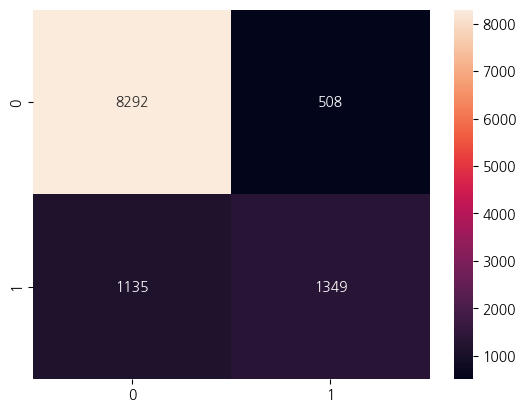

In [397]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(
    matrix,
    annot=True,
    fmt="d"
)

#fmt="d": 정수
#y축이 모델의 예측라벨, x축이 실제 라벨

In [395]:
threshold = 0.5
x_constant_test = sm.add_constant(x_test_edit)

y_train_pred = result.predict(x_constant_train) > threshold
y_test_pred = result.predict(x_constant_test) > threshold

print("train accuracy:", round(accuracy_score(y_train, y_train_pred),4))
print("test accuracy:", round(accuracy_score(y_test, y_test_pred),4))

train accuracy: 0.8524
test accuracy: 0.8544


In [396]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8800
           1       0.73      0.54      0.62      2484

    accuracy                           0.85     11284
   macro avg       0.80      0.74      0.77     11284
weighted avg       0.85      0.85      0.85     11284



In [398]:
from sklearn.metrics import recall_score

print("recall:", recall_score(y_test, y_test_pred))

recall: 0.5430756843800322


#### 계산: ROC Curve

In [389]:
#스코어를 가져오기

y_train_pred = result.predict(x_constant_train)
y_test_pred = result.predict(x_constant_test)

In [ ]:
threshold

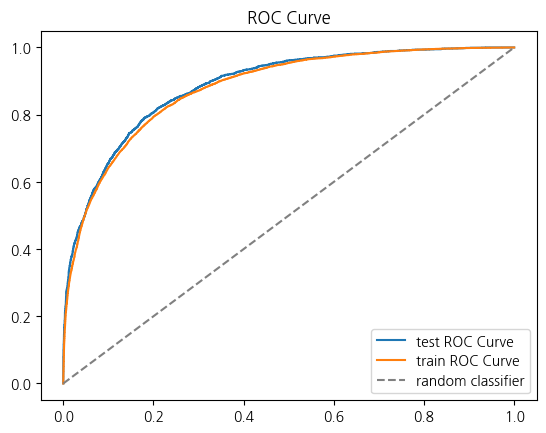

In [393]:
#그래프 그리기
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

test_fpr, test_tpr, threshold = roc_curve(y_test, y_test_pred)
train_fpr, train_tpr, threshold = roc_curve(y_train, y_train_pred)
plt.plot(test_fpr, test_tpr, label="test ROC Curve")
plt.plot(train_fpr, train_tpr, label="train ROC Curve")
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="random classifier")
plt.title("ROC Curve")
plt.legend()

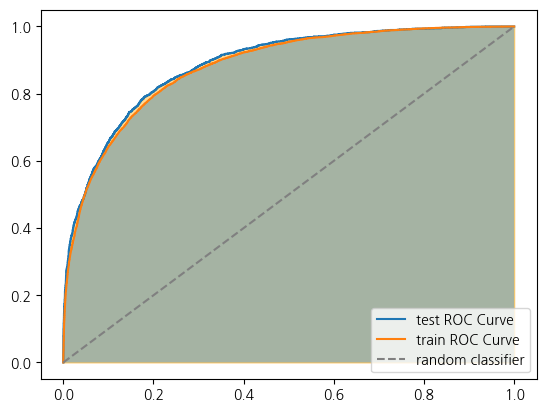

In [392]:
#그래프 그려보기
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(y_train, y_train_pred)
auroc = roc_auc_score(y_test, y_test_pred)

test_fpr, test_tpr, threshold = roc_curve(y_test, y_test_pred)
train_fpr, train_tpr, threshold = roc_curve(y_train, y_train_pred)

plt.fill_between(test_fpr, test_tpr, alpha=0.4, color="orange")
plt.fill_between(train_fpr, train_tpr, alpha=0.4)

plt.plot(test_fpr, test_tpr, label="test ROC Curve")
plt.plot(train_fpr, train_tpr, label="train ROC Curve")

plt.plot([0,1], [0,1], linestyle="--", color="gray", label="random classifier")

plt.legend()